# Classify the language given an input

Link to [dataset](https://www.kaggle.com/zarajamshaid/language-identification-datasst)

The dataset contains 1,000 rows for 22 languages (22,000 data points in total)

In [1]:
import pandas as pd
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# import scipy.sparse
import nltk
# from nltk.corpus import stopwords
import os
import re

from matplotlib import pyplot as plt
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix, f1_score
# import streamlit
# import pickle

# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

If this is your first time using the `nltk` library, uncomment the following cell to download the necessary modules.

In [2]:
# nltk.download()

In [3]:
df = pd.read_csv("dataset.csv")

df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


## Explore the dataset

In [4]:
df.language.value_counts()

Turkish       1000
Portugese     1000
Dutch         1000
English       1000
Indonesian    1000
Romanian      1000
Pushto        1000
Swedish       1000
Japanese      1000
Spanish       1000
Korean        1000
Thai          1000
Arabic        1000
Russian       1000
Latin         1000
Estonian      1000
French        1000
Tamil         1000
Urdu          1000
Persian       1000
Chinese       1000
Hindi         1000
Name: language, dtype: int64

## *Issue*
- `nltk.word_tokenize` currently only supports English. This is not a very important issue since most of the langauges have spaces, so they're still tokenized somewhat correctly.
- Languages that do not use spaces (such as Chinese and Japanese) are greatly affected by this.

### Potential Solutions
- For Chinese and Japanese, I could find any packages that specialize in these languages
- I do not know enough about all these languages to be certain that they're correctly tokenized.
    - I could talk with people who have experience with some of these languages to ensure the data is being processed correctly

We will see how the algorithms perform, even with this issue.

## I will not be including the languages that nltk do not support
I may come back to this at a later time to find packages that support the remaining languages.

In [5]:
# df['Language'] = df.language
# df['language'] = df['Language'].apply(lambda x: str.lower(x))

### List of languages in the dataset

In [6]:
languages = df['language'].apply(lambda x: str.lower(x)).unique().tolist()

languages

['estonian',
 'swedish',
 'thai',
 'tamil',
 'dutch',
 'japanese',
 'turkish',
 'latin',
 'urdu',
 'indonesian',
 'portugese',
 'french',
 'chinese',
 'korean',
 'hindi',
 'spanish',
 'pushto',
 'persian',
 'romanian',
 'russian',
 'english',
 'arabic']

### List of languages supported by `nltk`

In [7]:
# # Windows
# supported_languages = os.listdir("C:\\users\\johng\\appdata\\roaming\\nltk_data\\corpora\\stopwords")

# Mac OS
supported_languages = os.listdir('/Users/johngonzalez/nltk_data/corpora/stopwords')

supported_languages

['dutch',
 'german',
 'slovene',
 'hungarian',
 'romanian',
 'kazakh',
 'turkish',
 'russian',
 'README',
 'italian',
 'english',
 'greek',
 'tajik',
 'norwegian',
 'portuguese',
 'finnish',
 'danish',
 'french',
 'swedish',
 'azerbaijani',
 'spanish',
 'indonesian',
 'arabic',
 'nepali']

### Intersection between the two lists

In [8]:
# Find the intersection between lists
final_languages = list(set(languages) & set(supported_languages))
final_languages = [lang.capitalize() for lang in final_languages]

final_languages

['Swedish',
 'Spanish',
 'Romanian',
 'English',
 'Russian',
 'French',
 'Indonesian',
 'Arabic',
 'Dutch',
 'Turkish']

In [9]:
print(f'We will be using {len(final_languages)} languages from the {len(languages)} languages in the dataset')

We will be using 10 languages from the 22 languages in the dataset


### Keep the rows that have the supported languages

In [10]:
df = df[df.language.isin(final_languages)]
df = df.reset_index(drop=True)

In [11]:
df.head()

,Text,language
0,sebes joseph pereira thomas på eng the jesuit...,Swedish
1,de spons behoort tot het geslacht haliclona en...,Dutch
2,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
3,kemunculan pertamanya adalah ketika mencium ka...,Indonesian
4,association de recherche et de sauvegarde de l...,French


# Data Cleaning
- Remove special characters from the text
- Remove any extra whitespaces from the text

In [12]:
48.72+19.95+27.99+14.25+13.95

124.86

In [13]:
def preprocess(text):
    text = re.sub("[\[\[\]\]?—\"\"«»]", "", text)  # Remove special characters
    text = text.replace('\u200b', '')
    text = re.sub("-", " ", text)  # Replace '-' with a space
    text = " ".join(text.split())  # Remove any extra spaces
    text = text.lower()
    
    return text

In [14]:
df['Cleaned_Text'] = df['Text'].apply(lambda x: preprocess(x))

df.head()

,Text,language,Cleaned_Text
0,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuits...
1,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
2,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish,tsutinalar i̇ngilizce tsuutina kanadada albert...
3,kemunculan pertamanya adalah ketika mencium ka...,Indonesian,kemunculan pertamanya adalah ketika mencium ka...
4,association de recherche et de sauvegarde de l...,French,association de recherche et de sauvegarde de l...


In [15]:
df.language.value_counts()

Turkish       1000
Romanian      1000
French        1000
Indonesian    1000
English       1000
Spanish       1000
Russian       1000
Swedish       1000
Arabic        1000
Dutch         1000
Name: language, dtype: int64

### Histogram of Number of Words

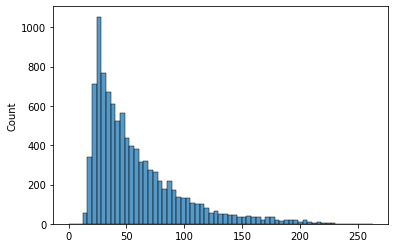

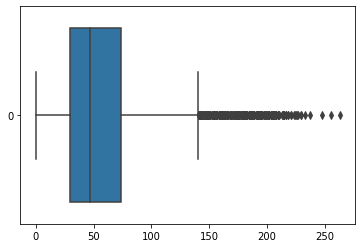

In [16]:
num_words = df['Cleaned_Text'].apply(lambda x: len(nltk.word_tokenize(x))).tolist()

sns.histplot(data=num_words)
plt.show()

sns.boxplot(data=num_words, orient='h')
plt.show()

# Save DataFrame
Save as Pickle object

In [17]:
df.to_pickle("./saved-items/df.pkl")